# Interpolation polynomiale

In [1]:
%pylab inline
import time

Populating the interactive namespace from numpy and matplotlib


## 1 - Comparaison de deux méthodes d'évaluation de polynômes


### Méthode naïve
On veut évaluer, en un $c$ donné, le polynôme $p$ défini par 
$$
p(x) = a_0 + a_1 x +a_2 x^2 + ... + a_{n-1} x^{n-1}+  a_n x^n.
$$

**Question **: étant donnés un réel $c$ et une liste $a = [a_0, a_1, a_2, ..., a_{n-1}, a_n]$, écrire une fonction **p1(c,a)** qui prend comme arguments **c** et **a** et qui calcule $p(c)$ le plus naïvement possible.

On pourra vérifier que l'évaluation de $p(x) = 1+2x+3x^2$ en $c = 5$ vaut $86$.

In [9]:
def p1(x, a):
    result = 0
    taille_a = len(a)
    for i in range(taille_a):
        result += (x**i)*a[i]
    return result
print(p1(5, (1, 2, 3)))

86


### Algorithme de Hörner

On rappelle l'algorithme de Hörner vu en TD : si on définit la suite $(b_k)_{k = 0, ..., n}$ par
$$
\left\{
\begin{array}{rcll}
b_n & = & a_n\\
b_k & = & b_{k+1} c +a_k & \forall k = n-1, n-2, ..., 1, 0.
\end{array}
\right.
$$
On peut montrer que $p(x) = (x-c)(b_n x^{n-1}+b_{n-1}x^{n-2}+...+b_2 x+b_1)+b_0$ et donc que $p(c) = b_0$.

**Question **: étant donnés un réel $c$ et une liste $a = [a_0, a_1, a_2, ..., a_{n-1}, a_n]$, écrire une fonction **p2(c,a)** qui prend comme arguments **c** et **a** et qui calcule $p(c)$ en utilisant l'algorithme de Hörner.

In [27]:
def p2(x, a):
    result = 0
    tailleA = len(a)
    i = tailleA - 2
    b = a[tailleA-1]
    while i>=0:
        result = b*x+a[i]
        i -= 1
        b = result
    return result
print(p2(5, (1, 2, 3)))

86


### Comparaison

Dans le code ci-dessous, on compare les temps de calcul, en un vecteur $c$ de taille $1000$, des deux algorithmes précédents (naïf et Hörner) pour des degrés de polynôme croissants. Qu'en concluez-vous ?

Text(0,0.5,"temps d'évaluation du polynôme, en secondes")

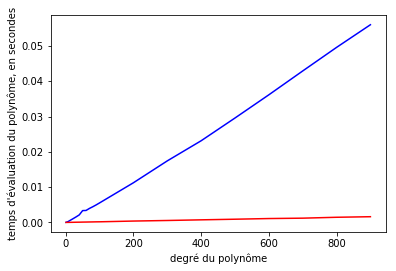

In [31]:
c = rand(1000,1)
tps1 = []
tps2 = []
abscisses = []
for n in range(1,10,1):
    abscisses.append(n)
    atest = rand(n,1)
    
    deb = time.time()
    val1 = p1(c,atest)
    tps1.append(time.time()-deb)
    
    deb = time.time()
    val2 = p2(c,atest)
    tps2.append(time.time()-deb)
for n in range(10,100,10):
    abscisses.append(n)
    atest = rand(n,1)
    
    deb = time.time()
    val1 = p1(c,atest)
    tps1.append(time.time()-deb)
    
    deb = time.time()
    val2 = p2(c,atest)
    tps2.append(time.time()-deb)
for n in range(100,1000,100):
    abscisses.append(n)
    atest = rand(n,1)
    
    deb = time.time()
    val1 = p1(c,atest)
    tps1.append(time.time()-deb)
    
    deb = time.time()
    val2 = p2(c,atest)
    tps2.append(time.time()-deb)

plot(abscisses,tps1,color='b')
plot(abscisses,tps2,color='r')
xlabel("degré du polynôme")
ylabel("temps d'évaluation du polynôme, en secondes")

## 2 - Quelques préliminaires


### Subdivision régulière

**Question** : écrire une fonction **equirep** qui prend $a$, $b$ et $d$ comme arguments et qui produit $d+1$ points $a_0 = a$, $a_1$, ..., $a_d = b$ équirépartis dans l'intervalle $[a,b]$.

Vérifier que **equirep(-1,1,5)** retourne **[-1.  -0.6 -0.2  0.2  0.6  1. ]**.

In [40]:
def equirep(a, b, d):
    lstFin = []
    nbValInter = b - a
    inc = nbValInter / (d)
    lstFin.insert(0, a)
    for i in range(d-1):
        a += inc
        lstFin.append(a)
    lstFin.append(b)
    return lstFin
print(equirep(-1 ,1 ,5))
    

[-1, -0.6, -0.19999999999999996, 0.20000000000000007, 0.6000000000000001, 1]


### Une première fonction test

**Question** : écrire une fonction **jolie** qui, étant donné un vecteur $x$, retourne le vecteur des images de chaque composante de $x$ par la fonction $f$ définie sur $\mathbb{R}$ par $f(x) = x\sin(\pi x).$

On pourra vérifier que **jolie([-1.5,0,1.5,2]) = [ -1.50000000e+00   0.00000000e+00  -1.50000000e+00  -4.89858720e-16]**.

In [43]:
def jolie(x):
    tailleLst = len(x)
    for i in range(tailleLst):
        x[i] = x[i]*sin(pi*x[i])
    return x
print(jolie([-1.5,0,1.5,2]))

[-1.5, 0.0, -1.5, -4.898587196589413e-16]


**Question** : En utilisant **equirep** et **jolie**, tracer en bleu la fonction $f$ sur l'intervalle $[-1.5,1.5]$. On veillera à utiliser suffisamment de points pour que le tracé soit bien lisse.

In [47]:
abscisse = equirep(-1.5, 1.5, 10)
# add ordonées

### Une seconde fonction test

**Question** : écrire une fonction **cloche** qui, étant donné un vecteur $x$, retourne le vecteur des images de chaque composante de $x$ par la fonction $g$ définie sur $\mathbb{R}$ par
$$
g(x) = \dfrac{1}{1+100 x^2}.
$$

On pourra vérifier que **cloche([-1,0,1,2]) = [ 0.00990099  1.          0.00990099  0.00249377]**.

**Question** : En utilisant **equirep** et **cloche**, tracer en rouge la fonction $g$ sur l'intervalle $[-1.5,1.5]$. On veillera à utiliser suffisamment de points pour que le tracé soit bien lisse.

## 3 - Construction de la forme de Lagrange du polynôme d'interpolation

On rappelle que l'unique polynôme $p$ de degré $\leq d$ tel que 
$p(a_i) = f_i$, $\forall i = 0, ..., d$, 
est donné, $\forall x \in \mathbb{R}$, par la formule
$$
p(x) = \sum_{j = 0}^{d} f_{j} l_{j,d}(x) 
\mbox{ avec } 
l_{j,d}(x) = \prod_{\stackrel{k = 0}{k\neq j}}^{d} \dfrac{x-a_k}{a_j-a_k}.
$$

**Question** : écrire une fonction **lagrange** qui prend un réel $c$ et 2 vecteurs $avec$ (contenant les abscisses $a_i$) et $fvec$ (contenant les ordonnées $f_i$) comme arguments d'entrée et qui produit le réel $p(c)$. 
    
On testera cette fonction avec $avec = [0,1,2]$ et $fvec = [0,1,4]$.
On vérifiera que **lagrange(avec[i],avec,fvec)** retourne $fvec[i]$ pour $i = 0,1,2$.

**Question** : écrire une fonction **trace_e** qui, pour les arguments d'entrée $a$, $b$, $d$ et **nom_fonction**, trace sur un même graphique la fonction **nom_fonction** **en rouge**, les points d'interpolation **en noir** et le polynôme d'interpolation aux points équidistants **en bleu** sur l'intervalle $[a,b]$. 

On pourra tester cette fonction avec $a = -1$, $b = 1$ et **jolie**, en faisant varier $d$ pour observer ce qui se passe.

**Question** : tester maintenant **trace_e** avec $a = -1$, $b = 1$ et **cloche**, en faisant varier $d$ pour observer ce qui se passe.

## 4 - Points de Chebyshev

Les points de Chebyshev dans l'intervalle $[a,b]$ sont donnés par la formule suivante : 
$$
a_i = \dfrac{a+b}{2}+\dfrac{b-a}{2}\cos\left(\dfrac{2i+1}{2(d+1)}\pi\right), 
\quad i = 0, ..., d.
$$

**Question** : écrire une fonction **cheb** qui prend $a$, $b$ et $d$ comme arguments et qui produit les $d+1$ points de Chebyshev dans l'intervalle $[a,b]$.

Vérifier que **cheb(-1,1,5)** retourne **[-0.96592583 -0.70710678 -0.25881905  0.25881905  0.70710678  0.96592583]**.

**Question** : tracer les deux suvdivisions de l'intervalle $[5,10]$ de 2 couleurs différentes, afin de comprendre la différence entre les deux.

**Question** : écrire une fonction **trace_c** qui, pour les arguments d'entrée $a$, $b$, $d$ et **nom_fonction**, trace sur un même graphique la fonction **nom_fonction** **en rouge**, les points d'interpolation **en noir** et le polynôme d'interpolation aux points de Chebyshev **en vert** sur l'intervalle $[a,b]$. 

On pourra tester cette fonction avec $a = -1$, $b = 1$ et **jolie**, en faisant varier $d$ pour observer ce qui se passe.

**Question** : tester maintenant **trace_c** avec $a = -1$, $b = 1$ et **cloche**, en faisant varier $d$ pour observer ce qui se passe.

## 5 - Différences divisées et forme de Newton

Nous allons maintenant programmer la forme de Newton du polynôme d'interpolation de Lagrange. 

Pour ce faire, nous allons commencer par écrire une fonction **DD** qui prend 2 vecteurs $avec$ (contenant les abscisses $a_i$) et $fvec$ (contenant les ordonnées $f_i$) comme arguments d'entrée et qui produit la matrice des différences divisées.

On rappelle que les différences divisées s'obtiennent par récurrence : pour tout entier $l\geq 1$, 
$$
f[a_0, a_1, ..., a_l] = \dfrac{f[a_1, a_2, ..., a_l]-f[a_0, a_1, ..., a_{l-1}]}{a_l-a_0}.
$$

On construit maintenant une fonction **newton** qui prend comme arguments d'entrée 
+ le vecteur $avec$ contenant les abscisses $a_i$, 
+ la matrice $D$ des différences divisées associées 
+ et un scalaire $c$  

et qui produit le scalaire $p(c)$ en utilisant la forme de Newton du polynôme d'interpolation de Lagrange. 

On rappelle ci-dessous l'algorithme qui permet de calculer $P := p(c)$ connaissant $avec$, $f$, $D$ et $c$ :

+ $P = 0$
+ $\pi = 1$
+ Pour $j$ de $0$ à $d$ faire
    + $P = P+D_{j,j}\times\pi$ 
    + $\pi = \pi\times (c-a_j)$
    
On testera cette fonction avec $avec = [0,1,2]$ et $fvec = [0,1,4]$.
On vérifiera que **newton(avec[i],avec,fvec)** retourne $fvec[i]$ pour $i = 0,1,2$.

## 6 - Testons l'intérêt de la forme de Newton : l'ajout d'un point

Illustrons maintenant l'intérêt de la forme de Newton par rapport à celle de Lagrange, en voyant ce qui doit être modifié si on ajoute un point d'interpolation, c'est à dire si $avec$ et $fvec$ sont augmentés d'une case.

Pour ce faire on écrit une fonction **ajout_point(avec,fvec,D,u,v)** qui augmente 
+ le vecteur $avec$ de $u$,
+ le vecteur $fvec$ de $v$
+ et la matrice $D$ de la ligne correspondant à l'ajout du point d'interpolation $(u,v)$.

On testera cette fonction en ajoutant l'abscisse $0.5$ au tableau $avec$ utilisé à la question précédente.

On construit une fonction **newton_ap(avecnew,Dnew,P,pii,x)** qui met à jour la valeur $P$ du polynôme d'interpolation de Lagrange au point $x$ lorqu'on a ajouté le point $(u,v)$ aux points d'interpolation.

On testera cette fonction en ajoutant l'abscisse $0.5$ au tableau $avec$ et en comparant la valeur des 2 polynômes d'interpolation à la réponse de cloche, précisément en cette nouvelle abscisse.